In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfTransformer
import pickle

In [71]:
with open('lyrics_dict.pickle', 'rb') as handle:
    lyrics_dict = pickle.load(handle)

In [72]:
import pandas as pd
tracks = pd.read_csv('tracks.csv')
tracks_with_genre = tracks.loc[tracks.Genre.notnull()]

In [73]:

def index_genre(genre):
    return genre.strip('][').split(', ')[0][1:-1]

# tracks_with_genre["Genre"] = [x.strip('][').split(', ')[0] for x in tracks_with_genre.Genre]
tracks_with_genre['Genre'] = tracks_with_genre.Genre.apply(index_genre)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [74]:
tracks_with_genre

,Unnamed: 0,Label,Spotify,Title,Artist,Featured Artists,feat-string,artist-string,weav-track-prefix,Prefix formula,Genre,ISRC,GRID,source-UPC,Circle of Fifths
0,0,['recv68bB40bhbNHXl'],https://open.spotify.com/search/songs/Outkast%...,Ms Jackson,Outkast,NaN,NaN,Outkast,io.weav.tracks.MsJackson,MsJackson,Hip Hop,USAR10100783,NaN,NaN,0
1,1,['recrzFbrNYO25B8Yn'],https://open.spotify.com/search/songs/Whethan%...,Savage,Whethan,['recjJwJm290oHWAam'],Flux Pavilion,Whethan,io.weav.tracks.Savage,Savage,EDM,USAT21603407,A10302B0003796223G,7.567990e+10,2
2,2,['recv68bB40bhbNHXl'],https://open.spotify.com/search/songs/Run%20DM...,It’s Tricky,Run DMC,NaN,NaN,Run DMC,io.weav.tracks.ItsTricky,It’sTricky,Hip Hop,USAR18600005,NaN,NaN,8
3,3,['recrzFbrNYO25B8Yn'],https://open.spotify.com/search/songs/KREAM%20...,Another Life,KREAM,['recOvVIULnlI4VeU7'],Mark Asari,KREAM,io.weav.tracks.AnotherLife,AnotherLife,Dance,USAT21802943,A10302B0004488087Z,7.567991e+10,3
4,4,['recrzFbrNYO25B8Yn'],https://open.spotify.com/search/songs/The%20Kn...,Classic,The Knocks,['recqLLl5r1PhVMgCz'],Powers,The Knocks,io.weav.tracks.Classic,Classic,Dance,USAT21404380,A10302B0002670000S,7.567991e+10,2
5,5,['recrzFbrNYO25B8Yn'],https://open.spotify.com/search/songs/Sweater%...,Did You Wrong,Sweater Beats,['recZ8s5ZVWNWOOo8S'],MAX,Sweater Beats,io.weav.tracks.DidYouWrong,DidYouWrong,EDM,USAT21602118,A10302B0003570268J,7.567991e+10,7
6,6,['recrzFbrNYO25B8Yn'],https://open.spotify.com/search/songs/KREAM%20...,Taped Up Heart,KREAM,['recgX7mmgedEVLu1O'],Clara Mae,KREAM,io.weav.tracks.TapedUpHeart,TapedUpHeart,Pop,USAT21602970,A10302B00037083260,7.567990e+10,9
7,7,['recrzFbrNYO25B8Yn'],https://open.spotify.com/search/songs/Cash%20C...,Aftershock,Cash Cash,['rec0N4eduOwO3z7BU'],Jacquie Lee,Cash Cash,io.weav.tracks.Aftershock,Aftershock,EDM,USAT21600001,A10302B0003256081G,7.567991e+10,8
8,8,['recrzFbrNYO25B8Yn'],https://open.spotify.com/search/songs/Alex%20N...,Basically Over You,Alex Newell,NaN,NaN,Alex Newell,io.weav.tracks.BasicallyOverYou,BasicallyOverYou,Dance,USAT21802903,A10302B00044879620,7.567867e+10,7
9,9,['recrzFbrNYO25B8Yn'],https://open.spotify.com/search/songs/Galantis...,Rich Boy,Galantis,NaN,NaN,Galantis,io.weav.tracks.RichBoy,RichBoy,EDM,USAT21802930,A10302B0004488033S,7.567990e+10,8


In [75]:
lyrics_df = pd.DataFrame(lyrics_dict, index=['Lyrics']).T

In [76]:
lyrics_df["Title"] = lyrics_df.index.T

In [77]:
final = tracks_with_genre.merge(lyrics_df, on="Title")

In [123]:
final.head()

,Unnamed: 0,Label,Spotify,Title,Artist,Featured Artists,feat-string,artist-string,weav-track-prefix,Prefix formula,Genre,ISRC,GRID,source-UPC,Circle of Fifths,Lyrics
0,0,['recv68bB40bhbNHXl'],https://open.spotify.com/search/songs/Outkast%...,Ms Jackson,Outkast,NaN,NaN,Outkast,io.weav.tracks.MsJackson,MsJackson,Hip Hop,USAR10100783,NaN,NaN,0,"[Intro: André 3000]\nYeah, this one right here..."
1,1,['recrzFbrNYO25B8Yn'],https://open.spotify.com/search/songs/Whethan%...,Savage,Whethan,['recjJwJm290oHWAam'],Flux Pavilion,Whethan,io.weav.tracks.Savage,Savage,EDM,USAT21603407,A10302B0003796223G,7.567990e+10,2,[Verse 1: MAX]\nShe got me loving in the morni...
2,2,['recv68bB40bhbNHXl'],https://open.spotify.com/search/songs/Run%20DM...,It’s Tricky,Run DMC,NaN,NaN,Run DMC,io.weav.tracks.ItsTricky,It’sTricky,Hip Hop,USAR18600005,NaN,NaN,8,"[Intro]\nThis speech is my recital, I think it..."
3,3,['recrzFbrNYO25B8Yn'],https://open.spotify.com/search/songs/KREAM%20...,Another Life,KREAM,['recOvVIULnlI4VeU7'],Mark Asari,KREAM,io.weav.tracks.AnotherLife,AnotherLife,Dance,USAT21802943,A10302B0004488087Z,7.567991e+10,3,[Verse 1: Mark Asari]\nMaybe if the sky was op...
4,4,['recrzFbrNYO25B8Yn'],https://open.spotify.com/search/songs/The%20Kn...,Classic,The Knocks,['recqLLl5r1PhVMgCz'],Powers,The Knocks,io.weav.tracks.Classic,Classic,Dance,USAT21404380,A10302B0002670000S,7.567991e+10,2,"[Intro]\n1, 2, 3, 4\n\n[Intro]\nCome to me bab..."


In [79]:
genres = set(final.Genre)
genres

{'Alternative',
 'Bass',
 'Blues/Rock',
 'Classical',
 'Country',
 'Country/Pop',
 'Dance',
 'Drum n Bass',
 'EDM',
 'Electronic',
 'Funk',
 'Hip Hop',
 'House',
 'Jazz',
 'Kids',
 'Latin',
 'Metal',
 'Pop',
 'Pop/Rock',
 'RnB',
 'Rock',
 'Soundtrack',
 'Urban Pop'}

In [80]:
data = {'Alternative': [],
 'Bass': [],
 'Blues/Rock': [],
 'Classical': [],
 'Country': [],
 'Country/Pop': [],
 'Dance': [],
 'Drum n Bass': [],
 'EDM': [],
 'Electronic': [],
 'Funk': [],
 'Hip Hop': [],
 'House': [],
 'Jazz': [],
 'Kids': [],
 'Latin': [],
 'Metal': [],
 'Pop': [],
 'Pop/Rock': [],
 'RnB': [],
 'Rock': [],
 'Soundtrack': [],
 'Urban Pop': []}


for record in final.itertuples():
    genre = record[11]
    lyrics = record[-1]
    lines = lyrics.split("\n")
    clean_lyrics = []
    for line in lines:
        if len(line) > 0:
            if line[0] == "[" and line[-1] == "]":
                pass
            else:
                clean_lyrics.append(line)
    data[genre].append(" ".join(clean_lyrics).strip())


In [81]:
total = []
for k, v in data.items():
    for song in v:
        total.append((k, song))

In [82]:
final_df = pd.DataFrame(total)

In [83]:
le = LabelEncoder()
cv = CountVectorizer()
tt = TfidfTransformer()
labels = le.fit(final_df[0]) 
targets = cv.fit_transform(final_df[1])

# pd.readcsv('song_similarities.csv')
# tt.fit_transform(final_df[1])

In [85]:
from sklearn.manifold import TSNE

In [116]:
final_df = final_df[final_df[0] != 'Classical']

In [ ]:
tfidf = TfidfVectorizer()

In [117]:
set(final_df[0])

{'Country', 'Hip Hop', 'Latin', 'RnB', 'Rock'}

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

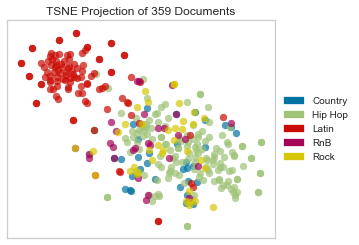

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer

corpus = final_df[1]
targets = final_df[0]
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(corpus)
y = targets

tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.poof()